In [1]:
import SWOF_functions_complete as SWOF
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
import cv2
from PIL import Image
%pylab inline

Using TensorFlow backend.
/home/jetson/.virtualenvs/engin_492/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jetson/.virtualenvs/engin_492/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jetson/.virtualenvs/engin_492/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jetson/.vir

Populating the interactive namespace from numpy and matplotlib


In [2]:

### 1. LOAD THE TRAINING MODEL


In [3]:
# load model
model = load_model('CNN_model.h5')
# summarize model.
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 106, 190, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 104, 188, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 94, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 52, 94, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 156416)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                10010688  


In [4]:

### 2. REAL TIME SWOF


In [5]:
video = cv2.VideoCapture(0)

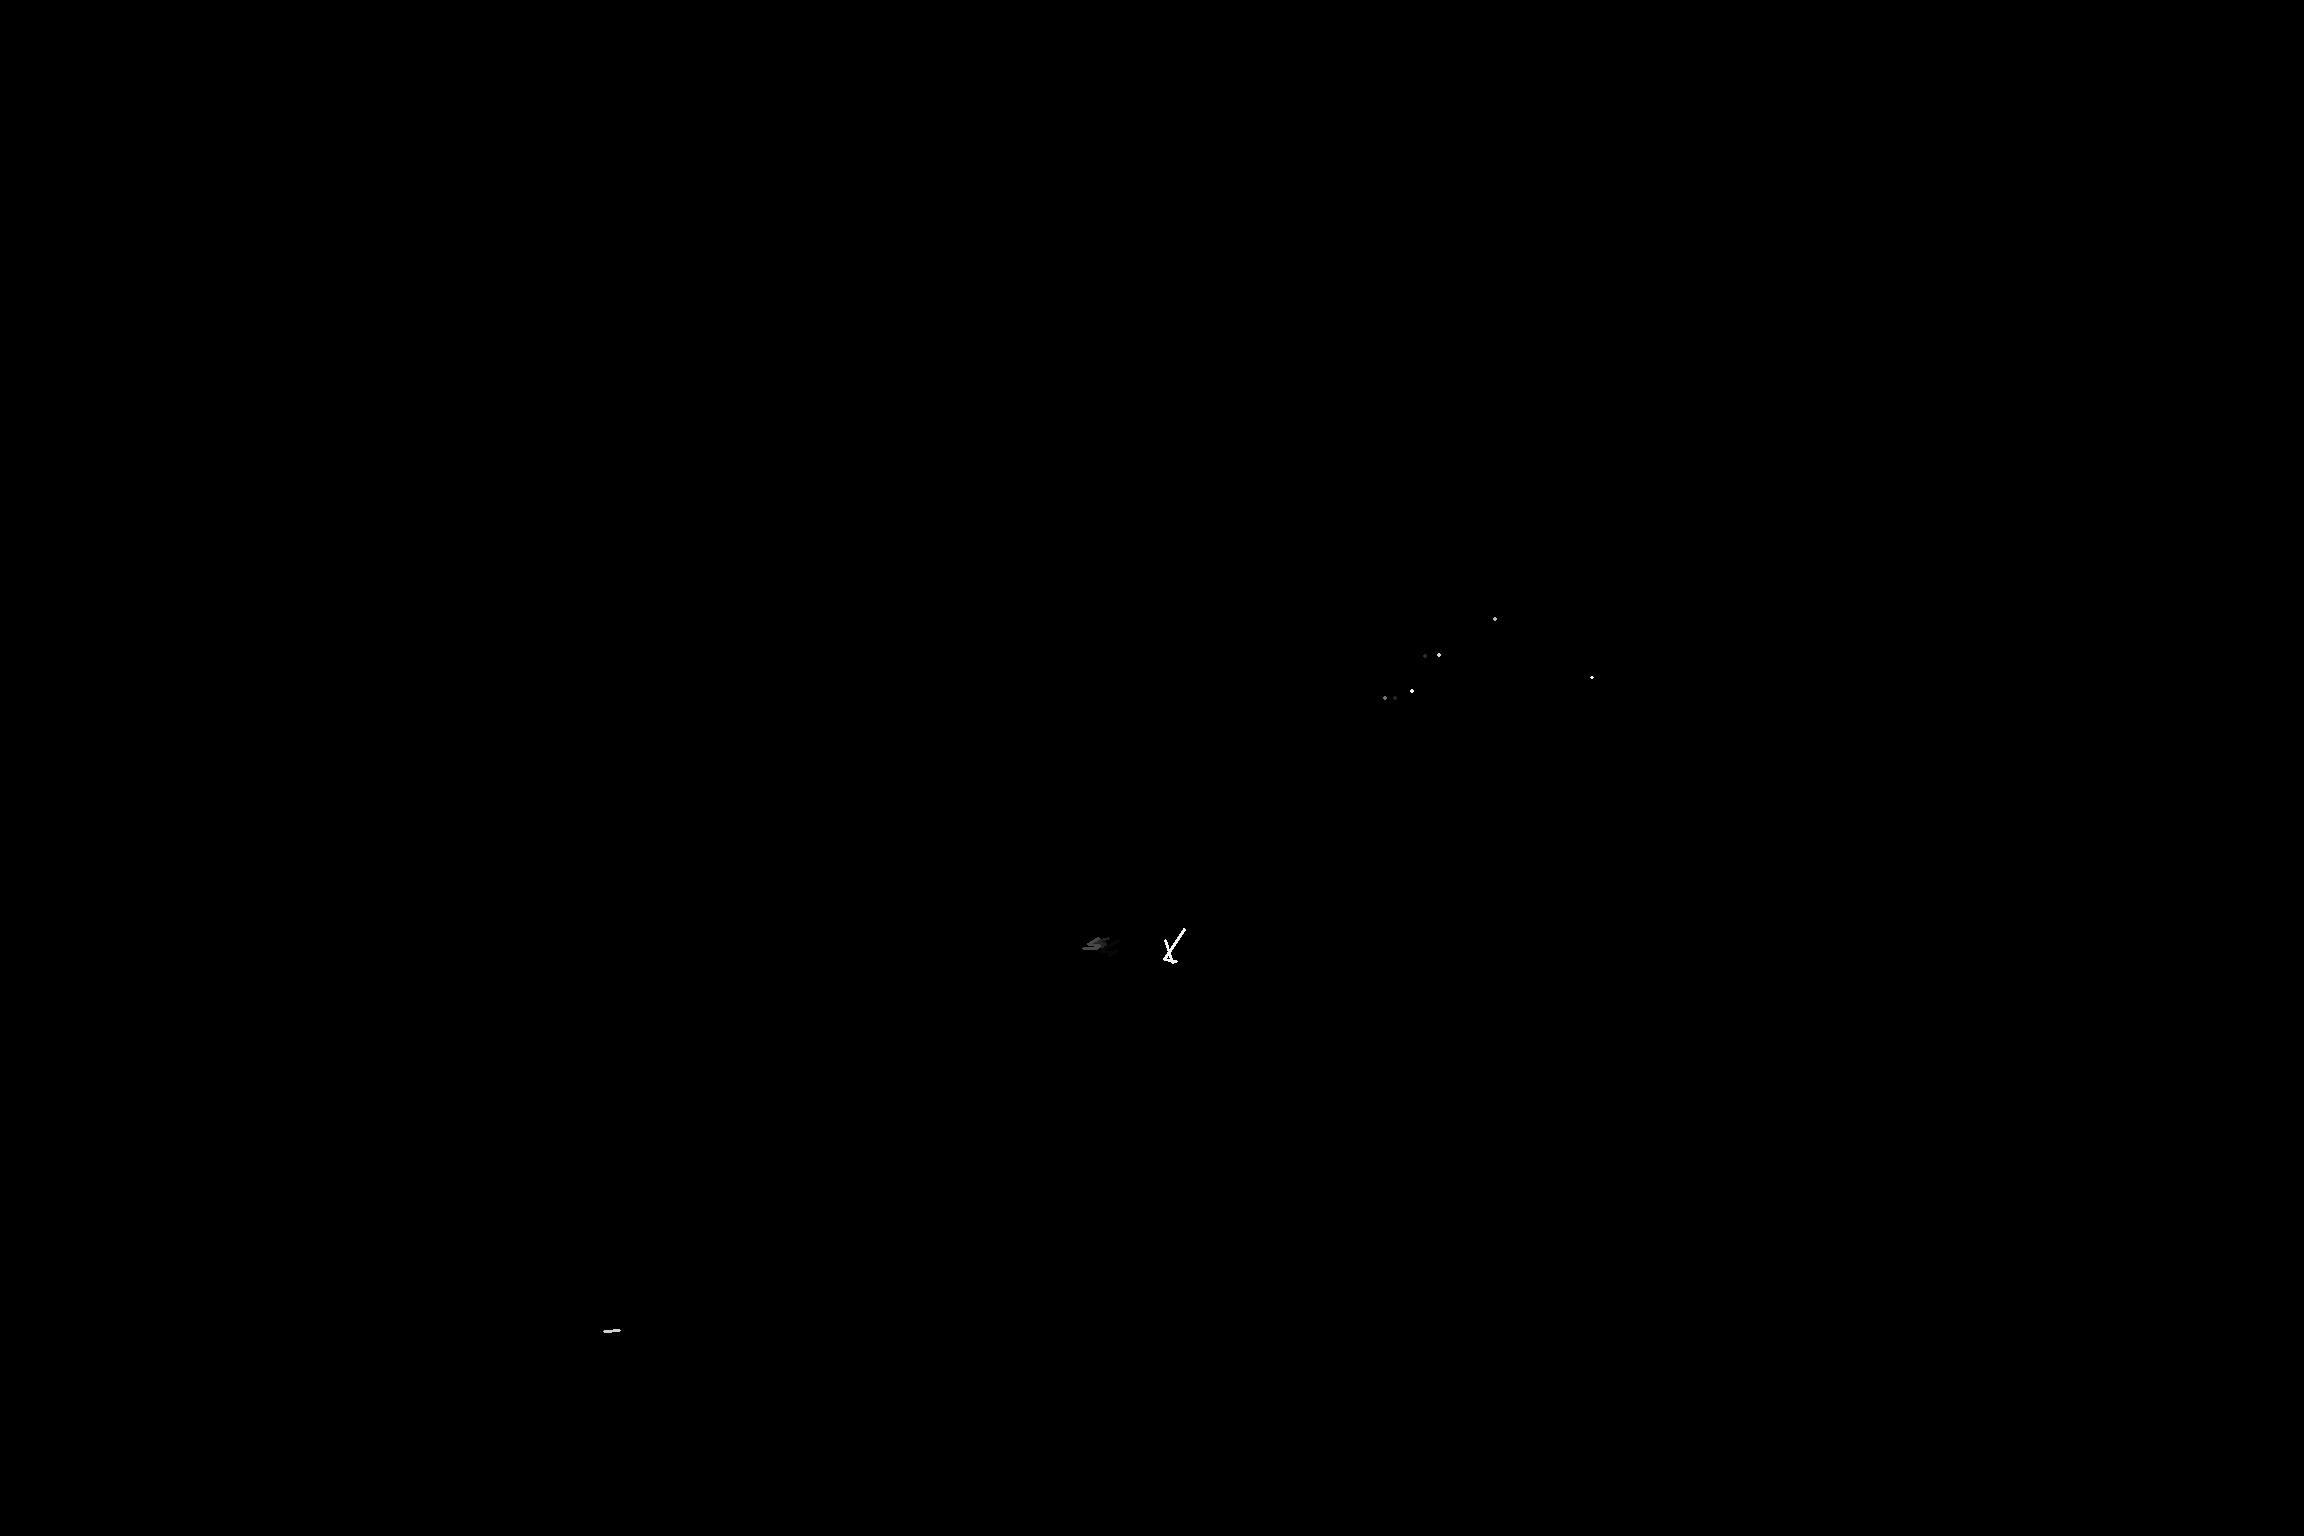

Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!
Look Out!


In [6]:
SWOF_images, frames, predictions = SWOF.rtcalc_SWOF(model=model, 
                                                    video=video, 
                                                    N=5, 
                                                    threshold_val=0.2, 
                                                    iterations_param=25)

In [ ]:

### SAVE PREDICTIONS MASKS AND FRAMES


In [7]:
#fill in paths
path_save_mask = '/home/jetson/complete/saved_SWOF_pred/mask/'
#do not include name you want for image
path_save_prediction = '/home/jetson/complete/saved_SWOF_pred/pred/test.txt'
#include the name you want for the file (ex. path\to\file\name_of_file.text)
path_save_frame = '/home/jetson/complete/saved_SWOF_pred/frame/'
#do not include name you want for image

In [11]:

# prepare file to write the prediction values
f = open(path_save_prediction, "w")
f.close()

for i in range(len(frames)):
    
    #save raw frame
    pil_img_f = Image.fromarray(frames[i]) 
    pil_img_f.save(path_save_frame +'raw_frame'+str(i)+'.jpeg')
    
    #because len of raw frames is not = len of crash predictions or mask we need this if statement so we dont go out of bounds
    
    if(i<(len(frames)-1)): # need to do -1 becuase the highest length for these variables are one less than the number of 
                             # frames that exist
        #save mask
        pil_img_f = Image.fromarray(SWOF_images[i])
        pil_img_f.save(path_save_mask +'mask_frame'+str(i+1)+'.jpeg')
        
        #save prediction in text file we created above
        f = open(path_save_prediction, "a")
        f.write('line# ' + str(i+1) + ':crash prediction ='+str(predictions[i]) + '\n') # have line# = i+1 because it will
                                                                                            # align with the numbering for raw
                                                                                            # frames
        f.close() # close to write again later